In [1]:
from src.drugexr.data_structs.vocabulary import Vocabulary
from src.drugexr.models.generator import Generator
from src.drugexr.config import constants as c
from torch.utils.data import DataLoader

import torch
import pandas as pd

In [3]:
vocabulary = Vocabulary(vocabulary_path=c.PROC_DATA_PATH / "chembl_voc.txt")
generator = Generator(vocabulary=vocabulary)
generator.load_from_checkpoint("../lightning_logs/version_9/checkpoints/epoch=9-step=33249.ckpt", vocabulary=vocabulary)

encoded_samples = generator.sample(1000)
decoded_samples = [vocabulary.decode(sample) for sample in encoded_samples]

In [4]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.ipython_useSVG=True

In [5]:
mols = [Chem.MolFromSmiles(mol) for mol in decoded_samples]

In [6]:
valid_mols = [mol for mol in mols if mol]

In [7]:
smiles = [Chem.MolToSmiles(mol) for mol in valid_mols]

In [15]:
f = filter(lambda x: len(x) > 1, smiles)

In [16]:
smiles = list(f)

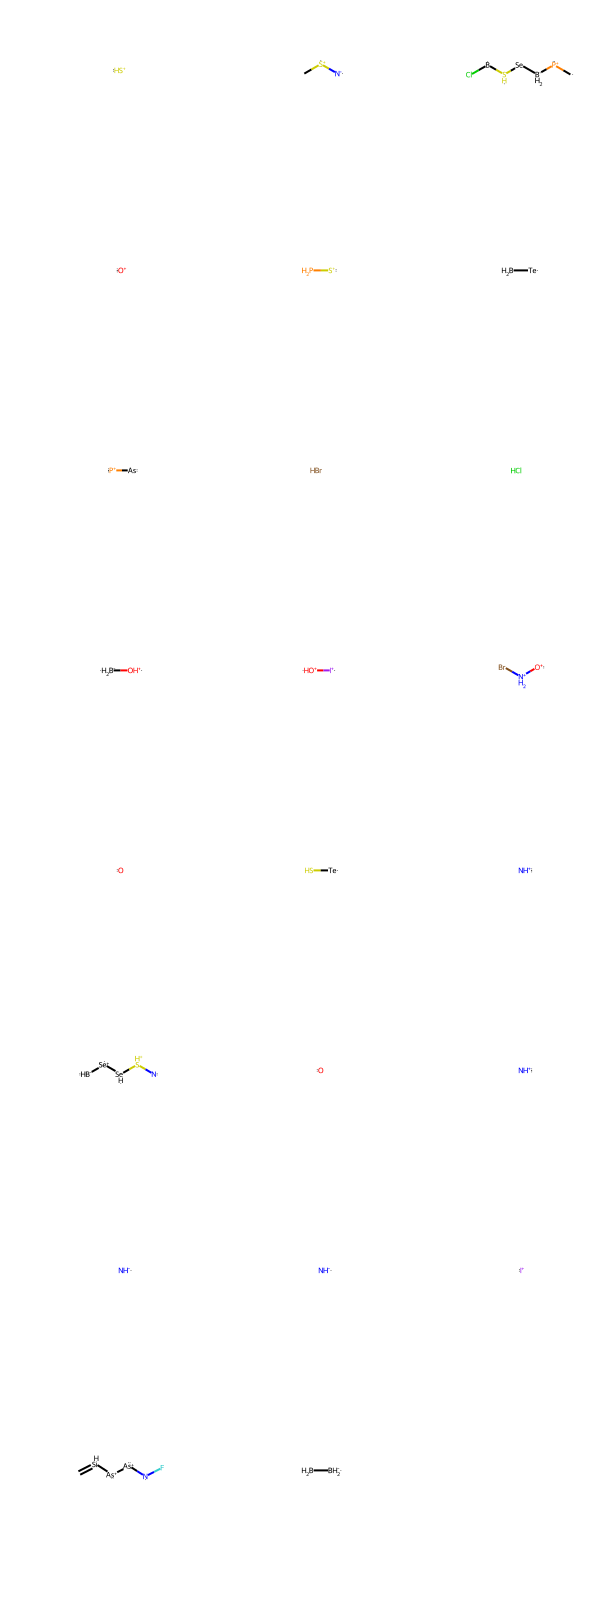

In [19]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in smiles])